In [107]:
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn import model_selection

In [108]:
obj = np.loadtxt('train.csv', delimiter = ',')
x = obj[:, :4]
y = obj[:, 4:]
obj.shape

(7176, 5)

In [109]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit(x)
x_scaled = x_scaled.transform(x)
x_scaled

array([[0.19935218, 0.2316726 , 0.69636229, 0.7883378 ],
       [0.58833922, 0.58434164, 0.60183123, 0.55201072],
       [0.43669022, 0.41921708, 0.46176689, 0.71313673],
       ...,
       [0.82420495, 0.78256228, 0.40757238, 0.52520107],
       [0.42873969, 0.51494662, 0.61989607, 0.51032172],
       [0.83333333, 0.65266904, 0.44048503, 0.3002681 ]])

In [110]:
# y_scaled = scaler.fit_transform(y) #This combines fit and transform
y_scaled = y

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_scaled,y)
len(x[0])

4

In [139]:
lr = 0.16
num_iterations = 10000
m, c = 0, 0  # Initialize parameters

for j in range(num_iterations):
    m_slope, c_slope = 0, 0
    M = len(x_train)
    for i in range(M):
        x = sum(x_train[i])
        y = y_train[i]
        m_slope += (-2/M) * (y - m * x - c) * x
        c_slope += (-2/M) * (y - m * x - c)
    new_m = m - lr * m_slope
    new_c = c - lr * c_slope
    m, c = new_m, new_c
    print(m,c)
print("Final coefficients (m, c):", m, c)

# Example usage:
# gd(x_train, y_train)


[316.15856091] [145.3856874]
[36.49707113] [23.28445122]
[279.33094849] [135.71127827]
[63.99876407] [42.44470458]
[250.45167694] [129.51929253]
[84.59031388] [58.41790323]
[227.69143232] [125.98961487]
[99.87511625] [71.92487793]
[209.64343959] [124.49179549]
[111.08604789] [83.52011917]
[195.22584455] [124.54122929]
[119.17106856] [93.63020433]
[183.60664852] [125.76545896]
[124.85904643] [102.5833471]
[174.14598534] [127.87826317]
[128.71037587] [110.63212001]
[166.35173402] [130.65973112]
[131.15590095] [117.9709275]
[159.84538628] [133.94094053]
[132.52684645] [124.74944221]
[154.33579962] [137.59217549]
[133.07783392] [131.08293706]
[149.59901423] [141.51386635]
[133.00458034] [137.06023043]
[145.46273278] [145.62962284]
[132.45750776] [142.74979568]
[141.79438585] [149.88087672]
[131.55220883] [148.2044593]
[138.49195454] [154.22276223]
[130.37749435] [153.46501367]
[135.47691335] [158.62094821]
[129.00158166] [158.56299515]
[132.68880349] [163.04920223]
[127.47685326] [163.5228

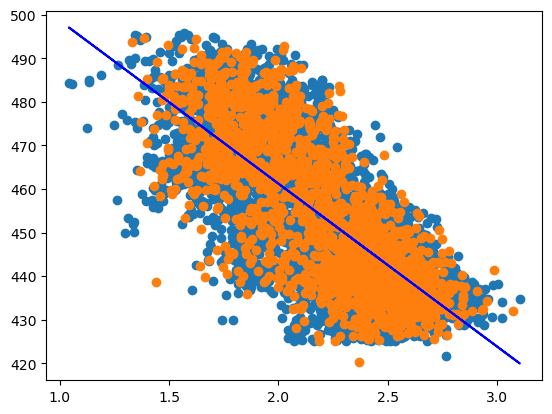

In [140]:
import matplotlib.pyplot as plt
temp= []
for i in x_train:
    temp.append(sum(i))
temp = np.array(temp)
plt.scatter(temp,y_train)
yp = m*temp + c
plt.plot(temp, yp, color = 'b' )

temp1= []
for i in x_test:
    temp1.append(sum(i))
temp1 = np.array(temp1)

plt.scatter(temp1,y_test)
# plt.plot(temp1, yp, color = 'o' )

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have X_train, y_train, X_test, and y_test
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
temp2= []
for i in x_test:
    temp2.append(sum(i))
yp = [[float(m*i + c)] for i in temp2]
# print(yp)
r2 = r2_score(y_test, yp)
print(f"R² score: {r2:.4f}")


R² score: 0.5782


C:\Users\Yash Garg\AppData\Local\Temp\ipykernel_11576\3310282187.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = [[float(m*i + c)] for i in temp2]
